In [1]:
import sys
sys.path.insert(1, "../")
import tensorflow as tf
import tensorflow.keras as keras
tf.random.set_seed(777)
import numpy as np
import matplotlib.pyplot as plt
from guaranteed_control.problems.pendulum import *
from guaranteed_control.problems.mountain_car import *
from guaranteed_control.intervals.interval import Interval
import tqdm
import gym
from guaranteed_control.ddpg.ddpg import DDPG, play, train
%load_ext autoreload
%autoreload 2

In [2]:
def plot_3d(env, actor, N=1000, pendulum=False):

    try:
        high = env.observation_space.high
        low = env.observation_space.low
    except:
        print('here')
    try:
        low, high = env.observation_space.high_low()
    except:
        print('here')

    N = 500

    X, Y = np.meshgrid(np.linspace(low[0], high[0], N), np.linspace(low[1], high[1], N))

    H = np.concatenate([X.reshape((-1, 1)), Y.reshape(-1, 1)], axis=1)

    if pendulum:
        X_cos, X_sin = np.cos(H[:,0]).reshape(-1, 1), np.sin(H[:, 0]).reshape(-1, 1)
        actions = agent.actor(np.concatenate([X_cos, X_sin, H[:,1].reshape(-1, 1)], axis=1))

    else:
        actions = agent.actor(H)

    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, actions.numpy().reshape(N, N))
    ax.set_xlabel('x: position')
    ax.set_ylabel('y: speed')
    ax.set_zlabel('z: action')

    plt.show()

In [7]:
#OU noise!!!!

with tf.device('/cpu:0'):
    env = Pendulum()
    env.reset()
    agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.05, epsilon_s=0.05, lambda_smooth=0.2, D_s=10)
    input_interval = Interval(interval=[[np.pi,np.pi+0.01], [1, 1+0.01]])
    low, high = input_interval.high_low()
    agent.start_training(env, agent, input_interval=input_interval, n_episodes=400)

In [7]:
#OU noise!!!!

with tf.device('/cpu:0'):
    env = MountainCar()
    env.reset()
    agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.4, epsilon_s=0.05, lambda_smooth=0, D_s=10)
    input_interval = Interval(interval=[[-0.6, -0.4], [-0.07, 0.07]])
    low, high = input_interval.high_low()
    agent.start_training(env, agent, input_interval=input_interval, n_episodes=600)

In [4]:
keras.models.save_model(agent.actor, filepath="./models/car_smooth_actor.tf", save_format="tf")
# keras.models.save_model(agent.critic, filepath="./models/pendulum_smooth_critic.tf", save_format="tf")

INFO:tensorflow:Assets written to: ./models/car_smooth_actor.tf\assets


c:\Users\ramla\anaconda3\envs\tf27\lib\site-packages\keras\layers\core\lambda_layer.py:297: UserWarning: ddpg is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


here


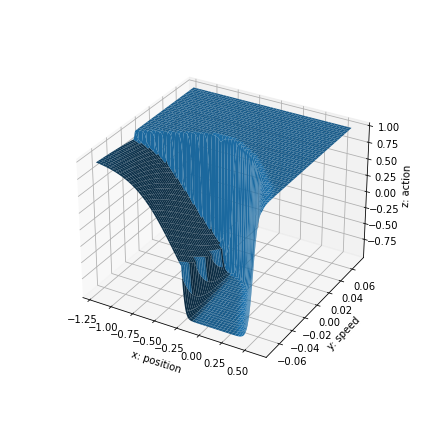

here


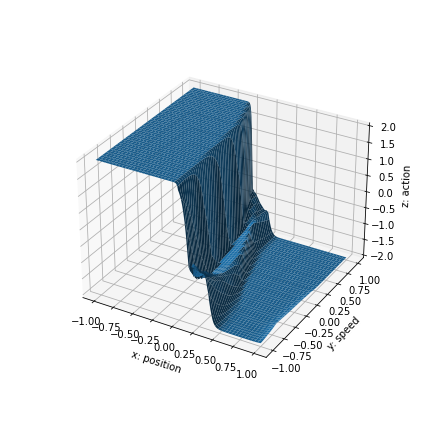

here


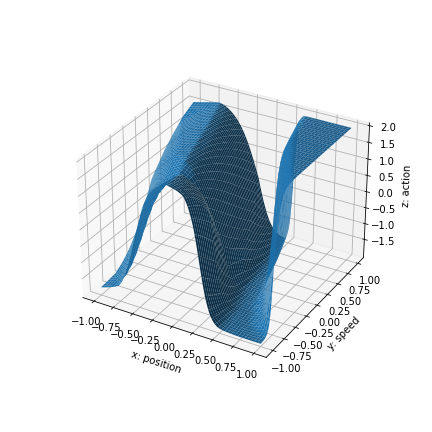

In [14]:
%matplotlib widget

env = mountain_car()
env.reset()
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.4, epsilon_s=0.05, lambda_smooth=0, D_s=10)
agent.actor = keras.models.load_model("./models/car_smooth_actor.tf")
plot_3d(env, agent.actor, N=2000, pendulum=False)

env = pendulum()
env.reset()
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.4, epsilon_s=0.05, lambda_smooth=0, D_s=10)
agent.actor = keras.models.load_model("./models/pendulum_actor_16_small_interval.tf")
plot_3d(env, agent.actor, N=2000, pendulum=True)

env = pendulum()
env.reset()
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.1, epsilon_s=0.05, lambda_smooth=0.2, D_s=10)
agent.actor = keras.models.load_model("./models/pendulum_smooth_actor.tf")
plot_3d(env, agent.actor, N=2000, pendulum=True)

[-1.23315217  0.61729437]


c:\Users\ramla\anaconda3\envs\tf27\lib\site-packages\keras\layers\core\lambda_layer.py:297: UserWarning: ddpg is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,
c:\Users\ramla\anaconda3\envs\tf27\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Impossible de modifier le mode thread une fois qu’il a été fixé
  warnings.warn(str(err))


Episode 0 finished with reward: -336.86223191315895
Episode 1 finished with reward: -339.15940239175336
Episode 2 finished with reward: -339.120598509241
Episode 3 finished with reward: -343.25009644844204


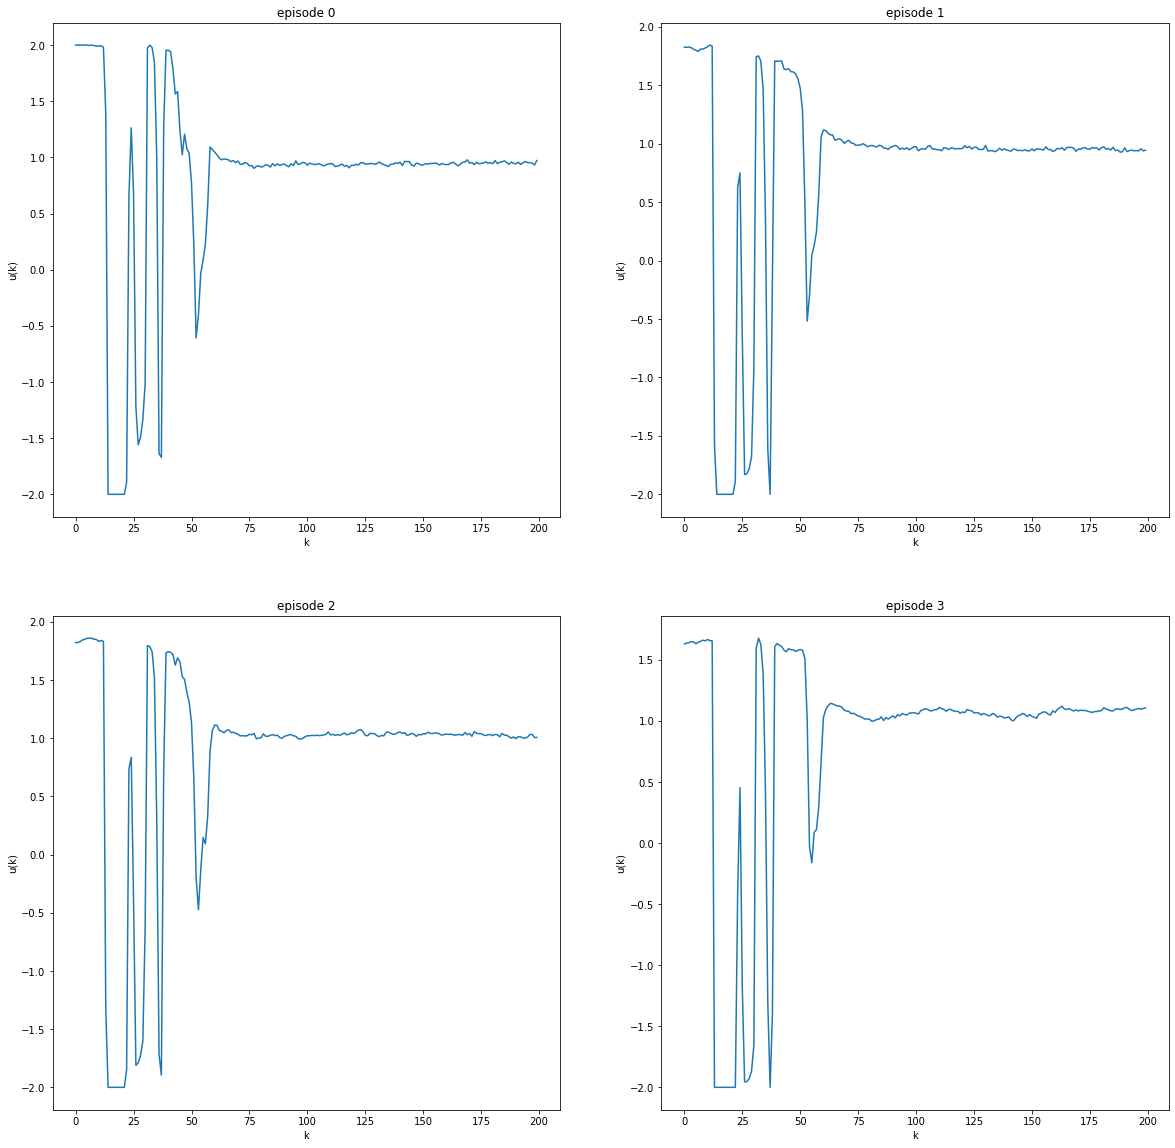

In [9]:
%matplotlib inline
with tf.device("/cpu:0"):
    env = pendulum()
    # print(env.unwrapped.state)
    env.reset()
    print(env.state)
    agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.1, epsilon_s=0.05, lambda_smooth=0.2, D_s=10)
    agent.actor = keras.models.load_model("./models/pendulum_smooth_actor3.tf")
    input_interval = Interval(interval=[[np.pi,np.pi+0.01], [1, 1+0.01]])
    eps_rewards, observations, actions = play(env, agent, n_games= 4, input_interval=input_interval, plot=True, watch=True)

-0.19040622


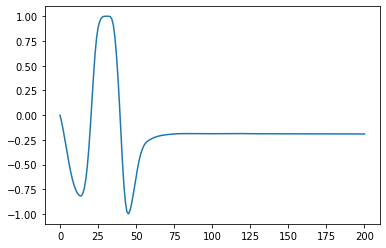

In [14]:
print(np.array(observations[0])[-1,1])
plt.plot(np.array(observations[0])[:,1])

0.9441884


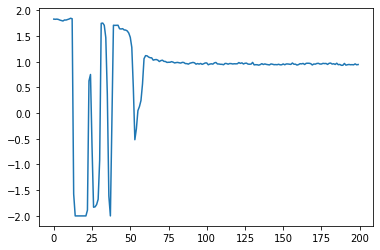

In [15]:
print(np.array(actions[1])[-1,0])
plt.plot(np.array(actions[1])[:,0])

[-0.49544883  0.        ]
Episode 0 finished with reward: 91.97354125976562


TypeError: 'AxesSubplot' object is not subscriptable

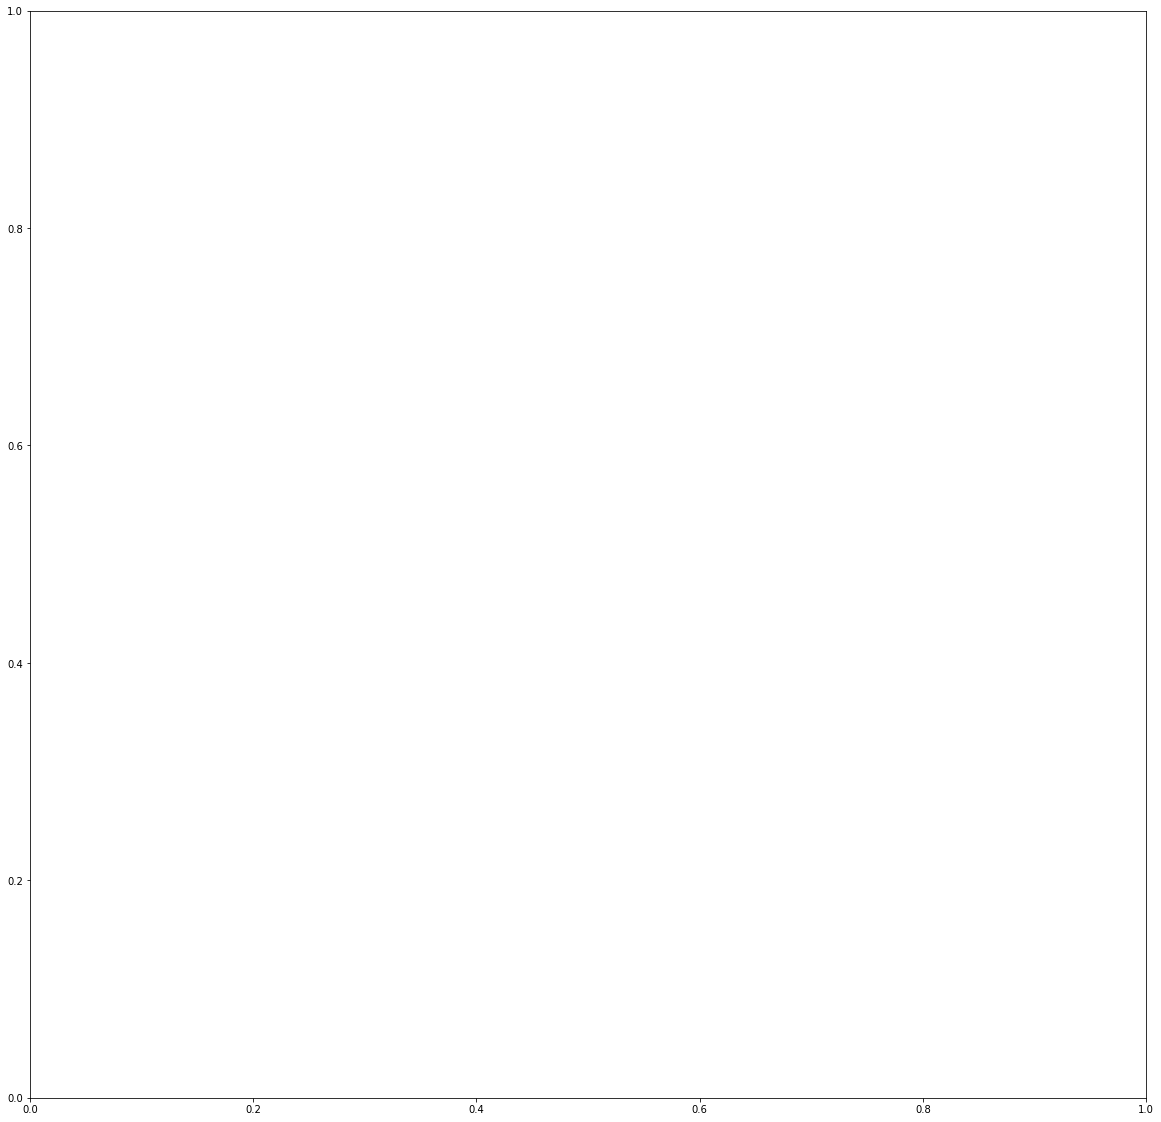

In [9]:
%matplotlib inline
with tf.device("/cpu:0"):
    env = mountain_car()
    # print(env.unwrapped.state)
    env.reset()
    print(env.state)
    agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.1, epsilon_s=0.05, lambda_smooth=0.2, D_s=10)
    agent.actor = keras.models.load_model("./models/car_actor.tf")
    input_interval = Interval(interval=[[-0.4, -0.4], [0.01, 0.01]])
    eps_rewards, observations, actions = play(env, agent, n_games= 1, input_interval=input_interval, plot=True, watch=True)

In [26]:
env = Pendulum()
print(env.done)

AttributeError: 'Pendulum' object has no attribute 'done'

In [ ]:
def success(observation, epsilon=1e-1):
    observation = np.array(observation)
    if np.sum(np.abs(observation[-40:, 0] - np.ones(40)) > epsilon) != 0:
        return False
    return True

def success_rate(observations):
    failures = []

    for i,observation in enumerate(observations): 
        if not(success(observation)):
            failures.append(i)

    return failures, 1 - len(failures)/len(observations)

In [103]:
failures, s_rate = success_rate(observations)
failures, s_rate

([], 1.0)

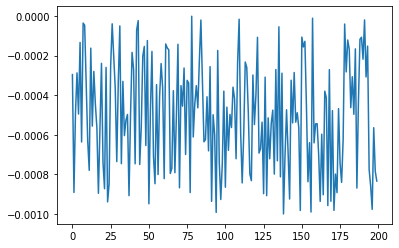

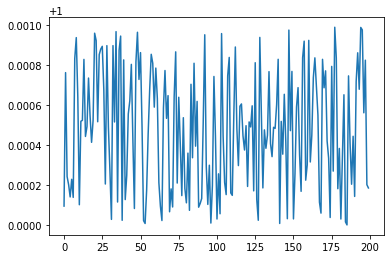

In [95]:
plt.plot([observations[i][0][0] for i in range(len(observations))])
plt.show()
plt.plot([observations[i][0][2] for i in range(len(observations))])
plt.show()

In [96]:
n = int(np.floor(np.sqrt(len(failures))))
fig, axs = plt.subplots(n+1, n, figsize=(15, 15))
for i, failure in enumerate(failures):
    axs[i//n][i%n].plot(np.array(actions[failure])[:,0], linewidth=1)
    axs[i//n][i%n].set_xlabel("k")
    axs[i//n][i%n].set_xlabel("u(k)")

plt.show()

fig, axs = plt.subplots(n+1, n, figsize=(15, 15))
for i, failure in enumerate(failures):
    axs[i//n][i%n].plot(np.array(observations[failure])[:,0], linewidth=1)
    axs[i//n][i%n].set_xlabel("k")
    axs[i//n][i%n].set_xlabel("u(k)")

plt.show()

fig, axs = plt.subplots(n+1, n, figsize=(15, 15))
for i, failure in enumerate(failures):
    axs[i//n][i%n].plot(np.array(observations[failure])[:,2], linewidth=1)
    axs[i//n][i%n].set_xlabel("k")
    axs[i//n][i%n].set_xlabel("u(k)")

plt.show()
    

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1080x1080 with 0 Axes>

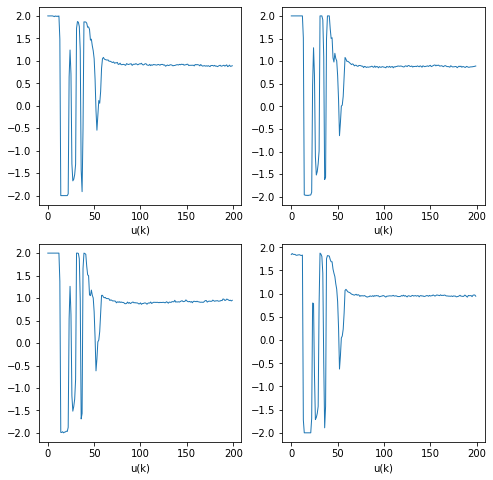

In [10]:
n = 2
fig, axs = plt.subplots(n, n, figsize=(8, 8))
for i, action in enumerate(actions):
    axs[i//n][i%n].plot(np.array(action)[:,0], linewidth=1)
    axs[i//n][i%n].set_xlabel("k")
    axs[i//n][i%n].set_xlabel("u(k)")

plt.show()

Episode 0 finished with reward: -114.10784671407993
Episode 1 finished with reward: -113.77321929917346
Episode 2 finished with reward: -113.91512918071771
Episode 3 finished with reward: -114.57221230335225
Episode 4 finished with reward: -113.5004263102897
Episode 5 finished with reward: -113.54446691553699
Episode 6 finished with reward: -113.42196296800603
Episode 7 finished with reward: -114.42069924129278
Episode 8 finished with reward: -113.34463126024731
Episode 9 finished with reward: -114.12147481072714
Episode 10 finished with reward: -113.6653611259119
Episode 11 finished with reward: -114.07340547579236
Episode 12 finished with reward: -114.97823819163332
Episode 13 finished with reward: -113.21446468232779
Episode 14 finished with reward: -113.96127701261527
Episode 15 finished with reward: -114.41608171328527


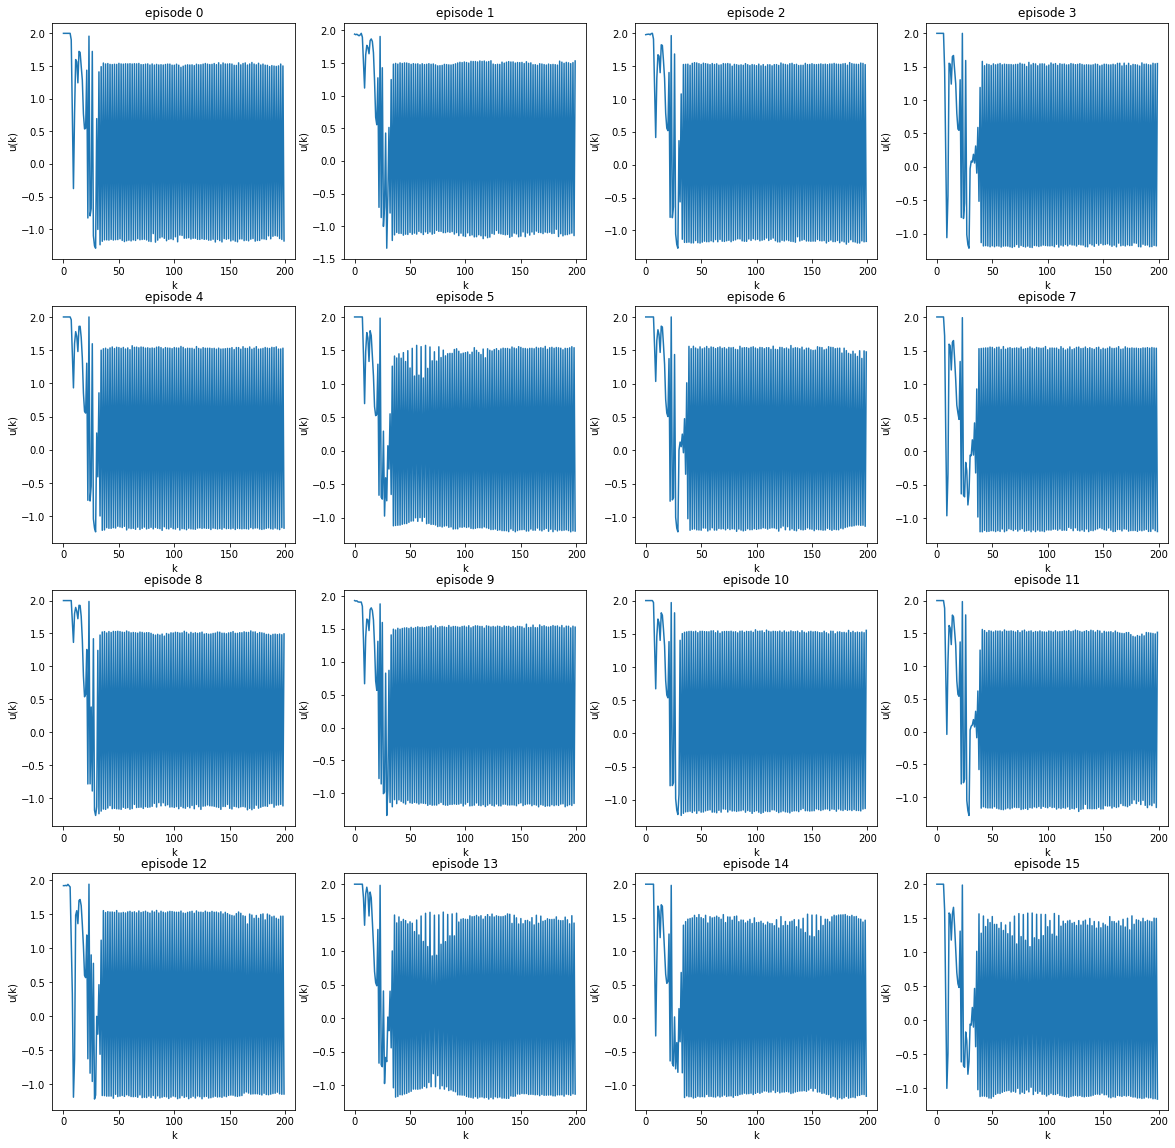

IndexError: index 2 is out of bounds for axis 0 with size 2

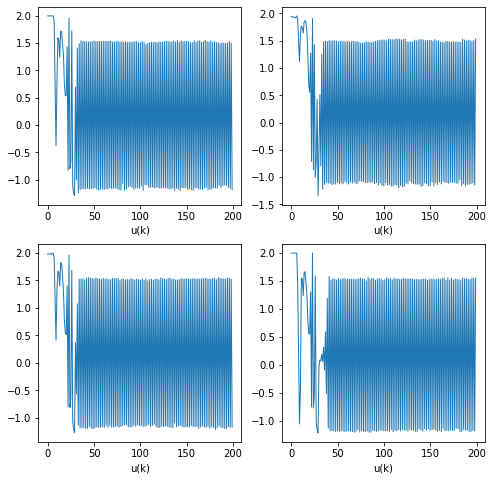

In [13]:
agent.actor = keras.models.load_model("./models/pendulum_actor_16_small_interval.tf")
eps_rewards, observations, actions = play(env, agent, n_games= 16, input_interval=Interval(interval=[[np.pi/2, np.pi/2+0.5], [1, 1]]))
n = 2
fig, axs = plt.subplots(n, n, figsize=(8, 8))
for i, action in enumerate(actions):
    axs[i//n][i%n].plot(np.array(action)[:,0], linewidth=1)
    axs[i//n][i%n].set_xlabel("k")
    axs[i//n][i%n].set_xlabel("u(k)")

plt.show()

In [2]:
# class ExtendedPendulumEnv(PendulumEnv):

#     def reset(self, input_interval = None, return_info: bool = False,):

#         high = np.array([np.pi, 1])

#         if input_interval == None:
#             self.state = self.np_random.uniform(low=-high, high=high)
#         else:
 
#             try:
#                 self.state = self.np_random.uniform(low = input_interval[0], high = input_interval[1])
#             except RuntimeError:
#                 print("Bad shape for input interval, need one dimensional interval object")

#         self.last_u = None
#         if not return_info:
#             return self._get_obs()
#         else:
#             return self._get_obs(), {}

#Will just change that on the files of the module, careful!!
#Recreating the module is not easy, because gym.make won't work that way
#Try to reimplement gym.make?

In [4]:
env = MountainCar
env.reset()
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16)

In [9]:
#OU noise!!!!
env = Pendulum
env.reset()
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=64, n_layer2=64, batch_size=64)

In [9]:
print(env.observation_space)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [4]:
input_interval = Interval(interval=[[-0.6, -0.4], [-0.07, 0.07]])
low, high = input_interval.high_low()
print(f"./models/car_actor{low[0]}_{low[1]}_{high[0]}_{high[1]}.tf")

./models/car_actor-0.6_-0.07_-0.4_0.07.tf


In [ ]:
input_interval = Interval(interval=[[np.pi/2,np.pi/2+0.1], [1, 1+0.1]])
low, high = input_interval.high_low()
train(env, agent, input_interval = input_interval, n_episodes=300)
keras.models.save_model(agent.actor, filepath="./models/pendulum_actor_16_small_interval.tf", save_format="tf")
keras.models.save_model(agent.critic, filepath="./models/pendulum_critic_16_small_interval.tf", save_format="tf")

Episode 0 finished with average reward: -37.53927993774414
Episode 1 finished with average reward: -42.084312438964844
Episode 2 finished with average reward: -40.38857650756836
Episode 3 finished with average reward: -12.26702880859375
Episode 4 finished with average reward: 10.009443283081055
Episode 5 finished with average reward: 24.14337730407715
Episode 6 finished with average reward: 34.66575241088867
Episode 7 finished with average reward: 19.60739517211914
Episode 8 finished with average reward: 28.33119773864746
Episode 9 finished with average reward: 35.00742721557617
Episode 10 finished with average reward: 40.54311752319336
Episode 11 finished with average reward: 43.24102783203125
Episode 12 finished with average reward: 47.352542877197266
Episode 13 finished with average reward: 50.88018035888672
Episode 14 finished with average reward: 53.902854919433594
Episode 15 finished with average reward: 56.71631622314453
Episode 16 finished with average reward: 58.82260894775390

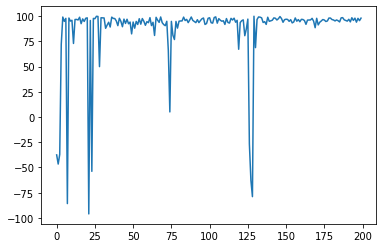

INFO:tensorflow:Assets written to: ./models/car_actor_speed_interval.tf\assets
INFO:tensorflow:Assets written to: ./models/car_critic_speed_interval.tf\assets


In [19]:
input_interval = Interval(interval=[[-0.6, -0.4], [-0.07, 0.07]])
low, high = input_interval.high_low()
train(env, agent, input_interval = Interval(interval=[[-0.6, -0.4], [-0.07, 0.07]]))
keras.models.save_model(agent.actor, filepath="./models/car_actor_speed_interval.tf", save_format="tf")
keras.models.save_model(agent.critic, filepath="./models/car_critic_speed_interval.tf", save_format="tf")

In [66]:
env = MountainCar
env.reset()
agent.actor = keras.models.load_model("./models/car_actor_speed_interval.tf")

In [68]:
env = Pendulum
env.reset()
agent.actor = keras.models.load_model("./models/pendulum_actor_64.tf")

In [100]:
# eps_rewards, observations, actions = play(env, agent, input_interval=Interval(interval=[[-0.54, -0.535], [-0.07, 0.07]]))
eps_rewards, observations, actions = play(env, agent, input_interval=Interval(interval=[[np.pi/2, np.pi/2+0.5], [1, 1]]))

Episode 0 finished with reward: -119.99532823291841
Episode 1 finished with reward: -119.80227283035681
Episode 2 finished with reward: -119.97653075413061
Episode 3 finished with reward: -120.42079538734997
Episode 4 finished with reward: -119.70414251802089
Episode 5 finished with reward: -628.4413128580285
Episode 6 finished with reward: -502.39527020104015
Episode 7 finished with reward: -120.5275820294869
Episode 8 finished with reward: -120.2838900731384
Episode 9 finished with reward: -120.1145998132221


Text(0.5, 0, 'k')

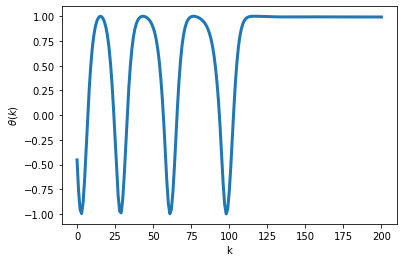

In [83]:
plt.plot(np.array(observations[7])[:, 0], linewidth=3)
plt.ylabel(r"$\theta(k)$")
plt.xlabel("k")

Text(0.5, 0, 'k')

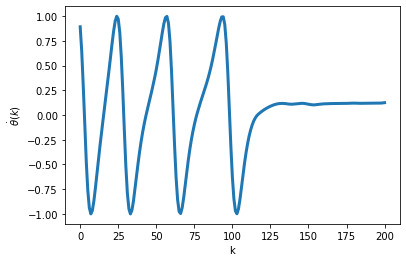

In [82]:
plt.plot(np.array(observations[7])[:, 1], linewidth=3)
plt.ylabel(r"$\dot{\theta}(k)$")
plt.xlabel("k")

Text(0, 0.5, 'u(k)')

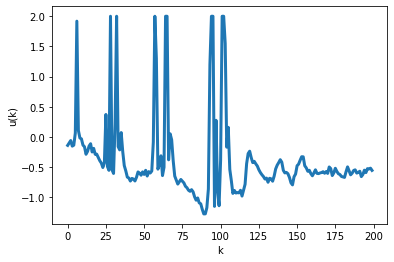

In [77]:
plt.plot(np.array(actions[7])[:, 0], linewidth=3)
plt.xlabel("k")
plt.ylabel("u(k)")

In [6]:
#OU noise!!!!
env = Pendulum
env.reset()
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=64, n_layer2=64, batch_size=64, noise_std=0.2, epsilon_s=0.05, lambda_smooth=0.2, D_s=10)
input_interval = Interval(interval=[[np.pi/2,np.pi/2+0.1], [1, 1+0.1]])
low, high = input_interval.high_low()
agent.start_training(env, agent, input_interval = input_interval, n_episodes=300)

In [15]:
agent = DDPG(env.observation_space.shape[0], 1, upper_bounds=env.action_space.high, n_layer1=16, n_layer2=16, batch_size=16, noise_std=0.1, epsilon_s=0.05, lambda_smooth=0.2, D_s=10)
agent.actor = keras.models.load_model("./models/car_smooth_actor.tf")

In [16]:
high = env.observation_space.high
low = env.observation_space.low
N = 500

X, Y = np.meshgrid(np.linspace(low[0], high[0], N), np.linspace(low[1], high[1], N))

H = np.concatenate([X.reshape((-1, 1)), Y.reshape(-1, 1)], axis=1)

actions = agent.actor(H)

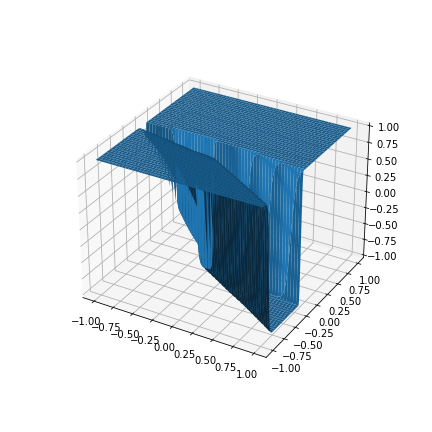

In [20]:
%matplotlib qt
